# Introduction

**According to the "OECD Economic Outlook, November 2022" (https://www.oecd.org/economic-outlook/november-2022#energy),**

*The global economy is facing significant challenges. Growth has lost momentum, high inflation has broadened out across countries and products, and is proving persistent. Risks are skewed to the downside. Energy supply shortages could push prices higher. Interest rates increases, necessary to curb inflation, heighten financial vulnerabilities. Russia’s war in Ukraine is increasing the risks of debt distress in low income countries and food insecurity.*

*Russia’s war of aggression against Ukraine has provoked a massive energy price shock not seen since the 1970s. The increase in energy prices is taking a heavy toll on the world economy, which will worsen if European gas storage runs short. This could force rationing in Europe, hurt countries worldwide as global gas prices are pushed higher. Growth would be lower and prices higher in Europe and worldwide.*

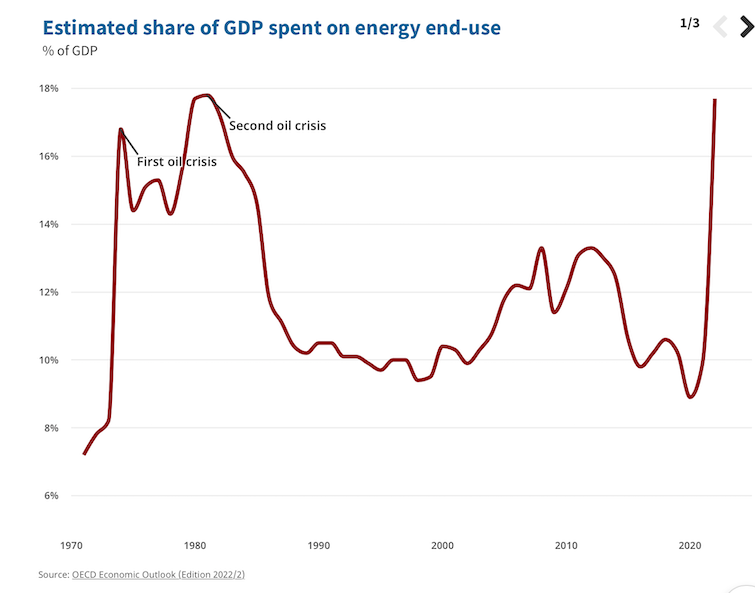

*Tighter monetary policy and higher real interest rates, persistently high energy prices, weak real household income growth and declining confidence are all expected to sap growth. The United States and Europe are slowing sharply and the major Asian emerging-market economies are expected to account for close to three-quarters of global GDP growth in 2023.*

**It seems to be not so good in Outlook. But there are some better economy countries and worse economy countries in Europe for some reason, especially war and conflict. In this notebook, I tried to find how much we have economy gap among European countries.**

reference: "OECD Economic Outlook, November 2022" (https://www.oecd.org/economic-outlook/november-2022#energy)

# Importing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/economy-of-europe-2022/Economy_Indicators.csv')

# Data Outline

In [ ]:
df.head()

In [ ]:
df.info()

# Data Preprocessing

In [ ]:
df=df.replace('           NA',np.nan,regex=True)

In [ ]:
df['GDP Quarter-over-Quarterr'] = df['GDP Quarter-over-Quarterr'].astype(float)
df['Interest Rate'] = df['Interest Rate'].astype(float)

In [ ]:
df.info()

In [ ]:
df=df.drop(0, axis=0)

# Visualization

In [ ]:
col=["GDP", "GDP Year-over-Year", "GDP Quarter-over-Quarterr",
       "Interest Rate", "Inflation Rate", "Jobless Rate", "Gov. Budget",
       "Debt/GDP", "Current Account", "Population"]

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(4,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,y=df[col[i]])

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(4,3,i+1)
    plt.title(col[i])
    sns.histplot(data=df,x=df[col[i]])

plt.tight_layout()
plt.show()

There are large gap in each features between minimum values and maximum values. It means that there are large economy gap among European countries.

In [ ]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f');

Strong Positive Correlation (>=0.5)
* GDP and Population : 0.8
* Current Account and Gov Budget : 0.6
* Interest Rate and Inflation Rate : 0.5

Strong Negative Correlation(<=-0.5)
* GDP Year-over-Year and Interest Rate : -0.6
* GDP Quarter-over-Quarter and Intereste Rate : -0.6
* Gov Budget and Debt/GDP : -0.5

# Clustering

* Add the feature which show GDP per capita.

In [ ]:
df['GDP_per_Population']=df['GDP']/df['Population']

In [ ]:
df.head()

In [ ]:
df1=df.drop('Country',axis=1)

* Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df1)
df_sc = pd.DataFrame(df_sc, columns=df1.columns)

In [ ]:
df_sc.head()

* Fill NaN with 0

In [ ]:
df_sc=df_sc.fillna(0)

* KMeans modeling by 4 clusters

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)

* Determin the numer of clusters by the elbow method.

In [ ]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We can divide data into four clusters.

* Analysis

In [ ]:
cluster = model.labels_

In [ ]:
df['Cluster']=cluster

In [ ]:
df.head()

In [ ]:
df.groupby('Cluster').mean().style.bar(axis=0)

In [ ]:
col2=['GDP', 'GDP Year-over-Year', 'GDP Quarter-over-Quarterr',
       'Interest Rate', 'Inflation Rate', 'Jobless Rate', 'Gov. Budget',
       'Debt/GDP', 'Current Account', 'Population', 'GDP_per_Population']

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(len(col2)):
    plt.subplot(4,3,i+1)
    plt.title(col2[i])
    sns.boxplot(data=df,y=df[col2[i]],x=df['Cluster'])

plt.tight_layout()
plt.show()

**There are some different features among clusters.**

**Cluster0 includes countries which are not so large in GDP and Population, but large in GDP per capita.**

In [ ]:
print(df[df['Cluster']==0][['Country']])

**Cluster1 is occupied by only one country, Ukraine. It has the highest inetest rate, higher inflation rate and higher jobless rate. And its GDP Year-over-Year and 'GDP Quarter-over-Quarter are lowest. It shows huge damage.**

In [ ]:
print(df[df['Cluster']==1][['Country']])

**Cluster2 includes larger GDP and larger population.**

In [ ]:
print(df[df['Cluster']==2][['Country']])

**Cluster3 includes countries which are not so large in GDP, Population and GDP per capita. It seems to be same with Cluster0 in GDP and Population, but it also seems to be opposite to Cluster0 in economy situation.**

In [ ]:
print(df[df['Cluster']==3][['Country']])

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
pca.fit(df_sc)
feature = pca.transform(df_sc)

In [ ]:
df['PCA1']=feature[:,0]
df['PCA2']=feature[:,1]
df['PCA3']=feature[:,2]

In [ ]:
df.groupby('Cluster')['PCA1','PCA2','PCA3'].mean().T.style.bar(axis=1)

**PCA1 is highest in Cluster1 and next highest in Cluster2.**

**PCA2 is highest in Cluster1 and next highest in Cluster0.**

**PCA3 is highest in Cluster2 and next highest in Cluster1.**


In [ ]:
pd.DataFrame(pca.components_,columns=df_sc.columns,index=['PCA1','PCA2','PCA3'])

**PCA1 is highest in Interest Rate and next highest in Inflation Rate.→ It shows something to be problem in economy.**

**PCA2 is highest in Population and next highest in GDP_per_Population.→　It shows something to be good in economy.**

**PCA3 is highest in GDP and next highest in Population.→　It shows scale of countries.**


In [ ]:
fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter=ax.scatter(df['PCA1'], df['PCA2'],df['PCA3'],alpha=0.8, c=cluster)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster0','Cluster1','Cluster2','Cluster3'],
           title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_)

**PCA1, PCA2 and PCA3 explain about 66%.**

reference: reference: "OECD Economic Outlook, November 2022" (https://www.oecd.org/economic-outlook/november-2022#energy)

**Thank you !**